In [66]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [67]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [68]:
url = 'https://www.nbastuffer.com/2021-2022-nba-referee-stats/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', id='tablepress-83')
ref = pd.read_html(str(table))[0]

In [69]:
ref.drop('RANK', axis=1, inplace=True)
ref[['EXPERIENCE (YEARS)', 'GAMES OFFICIATED', 'HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL', 'TOTAL POINTS PER GAME', 'CALLED FOULS PER GAME', 'FOUL% AGAINST ROAD TEAMS', 'FOUL% AGAINST HOME TEAMS', 'FOUL DIFFERENTIALFoul Differential Per GameSeason average of {Called Fouls Against Road Team} - {Called Fouls Against Home Team}. When foul differential is in positive figure, that referee (a.k.a. homey) favors home teams and is more prone to call against road teams.']] = ref[['EXPERIENCE (YEARS)', 'GAMES OFFICIATED', 'HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL', 'TOTAL POINTS PER GAME', 'CALLED FOULS PER GAME', 'FOUL% AGAINST ROAD TEAMS', 'FOUL% AGAINST HOME TEAMS', 'FOUL DIFFERENTIALFoul Differential Per GameSeason average of {Called Fouls Against Road Team} - {Called Fouls Against Home Team}. When foul differential is in positive figure, that referee (a.k.a. homey) favors home teams and is more prone to call against road teams.']].apply(pd.to_numeric)
ref.rename(
    columns={
        'FOUL DIFFERENTIALFoul Differential Per GameSeason average of {Called Fouls Against Road Team} - {Called Fouls Against Home Team}. When foul differential is in positive figure, that referee (a.k.a. homey) favors home teams and is more prone to call against road teams.': 'FOUL DIFFERENTIAL'
    }, inplace=True)

In [70]:
ref.columns

Index(['REFEREE', 'ROLE', 'EXPERIENCE (YEARS)', 'GAMES OFFICIATED',
       'HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL',
       'TOTAL POINTS PER GAME', 'CALLED FOULS PER GAME',
       'FOUL% AGAINST ROAD TEAMS', 'FOUL% AGAINST HOME TEAMS',
       'FOUL DIFFERENTIAL'],
      dtype='object')

In [71]:
ref.drop(ref[ref['GAMES OFFICIATED'] <= 6].index, inplace = True)

In [72]:
ref.columns

Index(['REFEREE', 'ROLE', 'EXPERIENCE (YEARS)', 'GAMES OFFICIATED',
       'HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL',
       'TOTAL POINTS PER GAME', 'CALLED FOULS PER GAME',
       'FOUL% AGAINST ROAD TEAMS', 'FOUL% AGAINST HOME TEAMS',
       'FOUL DIFFERENTIAL'],
      dtype='object')

In [73]:
ref[['EXPERIENCE (YEARS)', 'GAMES OFFICIATED', 'HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL','CALLED FOULS PER GAME', 'FOUL% AGAINST ROAD TEAMS','FOUL% AGAINST HOME TEAMS', 'FOUL DIFFERENTIAL', 'Home Rig Score','FOULS CALLED AGAINST ROAD TEAM', 'FOULS CALLED AGAINST HOME TEAM', 'HOME GAMES WON']] = ref[['EXPERIENCE (YEARS)', 'GAMES OFFICIATED','HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL','CALLED FOULS PER GAME', 'FOUL% AGAINST ROAD TEAMS','FOUL% AGAINST HOME TEAMS', 'FOUL DIFFERENTIAL', 'Home Rig Score','FOULS CALLED AGAINST ROAD TEAM', 'FOULS CALLED AGAINST HOME TEAM','HOME GAMES WON']].apply(pd.to_numeric)
ref

KeyError: "['FOULS CALLED AGAINST HOME TEAM', 'Home Rig Score', 'FOULS CALLED AGAINST ROAD TEAM', 'HOME GAMES WON'] not in index"

In [65]:
for index, row in ref.iterrows():
    ref.loc[index, "Home Rig Score"] = ref['HOME TEAM WIN%']*(ref['FOUL% AGAINST ROAD TEAMS']*ref['HOME TEAM POINTS DIFFERENTIAL'])
    

ValueError: Incompatible indexer with Series

In [59]:
ref.sort_values(by=['Home Rig Score'], ascending=False, inplace=True)
ref.drop(['TOTAL POINTS PER GAME'], axis=1, inplace=True)
ref['FOULS CALLED AGAINST ROAD TEAM'] = ref['FOUL% AGAINST ROAD TEAMS']*ref['CALLED FOULS PER GAME']
ref['FOULS CALLED AGAINST HOME TEAM'] = ref['FOUL% AGAINST HOME TEAMS']*ref['CALLED FOULS PER GAME']
ref['HOME GAMES WON'] = ref['HOME TEAM WIN%']*ref['GAMES OFFICIATED']
ref

REFEREE   ROLE  EXPERIENCE (YEARS)  GAMES OFFICIATED  \
0        Ray Acosta   CREW                   5                17   
1     Dedric Taylor   CREW                   9                15   
2     Brandon Adair   CREW                   5                15   
3      Nick Buchert   CREW                  12                14   
4   Scott Twardoski   CREW                  12                14   
..              ...    ...                 ...               ...   
59       Josh Tiven  CHIEF                  12                 7   
60       Zach Zarba  CHIEF                  19                 7   
61      Brian Forte  CHIEF                  16                 7   
62      Brian Forte   CREW                  16                 7   
63      Matt Boland   CREW                  23                 7   

    HOME TEAM WIN%  HOME TEAM POINTS DIFFERENTIAL  CALLED FOULS PER GAME  \
0            0.588                          2.353                 37.529   
1            0.667                          6.800                 40.533   
2            0.667                          4.067                 34.800   
3            0.429                          1.357                 35.500   
4            0.571                          2.786                 38.643   
..             ...                            ...                    ...   
59           0.714                         10.286                 35.857   
60           0.571                         -0.143                 32.571   
61           0.429                         -4.857                 40.143   
62           0.429                         -3.429                 38.714   
63           0.429                          3.714                 40.571   

    FOUL% AGAINST ROAD TEAMS  FOUL% AGAINST HOME TEAMS  FOUL DIFFERENTIAL  \
0                     49.687                    50.314               -0.2   
1                     53.290                    46.711                2.7   
2                     52.299                    47.701                1.6   
3                     47.887                    52.113               -1.5   
4                     49.538                    50.462               -0.4   
..                       ...                       ...                ...   
59                    48.207                    51.793               -1.3   
60                    52.194                    47.808                1.4   
61                    49.110                    50.889               -0.7   
62                    46.495                    53.506               -2.7   
63                    49.296                    50.705               -0.6   

    Home Rig Score  FOULS CALLED AGAINST ROAD TEAM  \
0              NaN                     1864.703423   
1              NaN                     2160.003570   
2              NaN                     1820.005200   
3              NaN                     1699.988500   
4              NaN                     1914.296934   
..             ...                             ...   
59             NaN                     1728.558399   
60             NaN                     1700.010774   
61             NaN                     1971.422730   
62             NaN                     1800.007430   
63             NaN                     1999.988016   

    FOULS CALLED AGAINST HOME TEAM  HOME GAMES WON  
0                      1888.234106           9.996  
1                      1893.336963          10.005  
2                      1659.994800          10.005  
3                      1850.011500           6.006  
4                      1950.003066           7.994  
..                             ...             ...  
59                     1857.141601           4.998  
60                     1557.154368           3.997  
61                     2042.837127           3.003  
62                     2071.431284           3.003  
63                     2057.152555           3.003  

[64 rows x 14 columns]

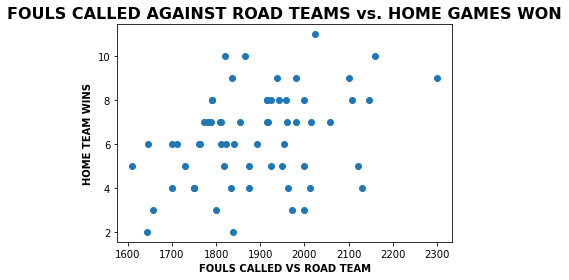

In [61]:
x = ref['FOULS CALLED AGAINST ROAD TEAM']
y = ref['HOME GAMES WON']

plt.scatter(x, y)
plt.title('FOULS CALLED AGAINST ROAD TEAMS vs. HOME GAMES WON', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('FOULS CALLED VS ROAD TEAM', fontdict={'fontweight':'bold'})
plt.ylabel('HOME TEAM WINS', fontdict={'fontweight':'bold'})
plt.show()

In [48]:
ref.set_index(['REFEREE EXPERIENCE (YEARS)', 'GAMES OFFICIATED', 'HOME TEAM WIN%', 'HOME TEAM POINTS DIFFERENTIAL', 'CALLED FOULS PER GAME', 'FOUL% AGAINST ROAD TEAMS', 'FOUL% AGAINST HOME TEAMS', 'FOUL DIFFERENTIAL', 'HOME RIG SCORE'], inplace=True)

KeyError: "None of ['REFEREE EXPERIENCE (YEARS)', 'HOME RIG SCORE'] are in the columns"

In [ ]:
ref